In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


If you haven't done so, install keras as well as tensorflow

In [2]:
#!pip install keras tensorflow

Loading some images for training and testing.  
Splitting the dataset into a train tuple and a test tuple is important to avoid overfitting.  
The test data shows, how good your model is.

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

## Explore the data you have loaded

Find out which kind of data you just have loaded:

In [4]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


### Train data

sample size: 60.000

each sample: 28 x 28 pixles



### Test data

sample size: 10.000

each sample: 28 x 28 pixles

In [5]:
print(train_labels.shape)
print(test_labels.shape)

(60000,)
(10000,)


In [6]:
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Each picture is a two-dimensional array, greyscale [0, 256].

The neuronal network likes to be fed with small numbers
though.

To be more sure about the picture plot it using matplotlib.

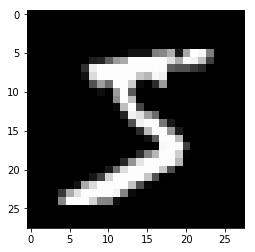

In [7]:
plt.imshow(train_images[0], cmap='gray')

In [8]:
print(train_labels[0])

5


Thus, we are dealing with the digit 5 in this picture.


## Setting up the network

Keras connets subsequent layers automatically (plain tensorflow doesn't)

In [54]:
# Initialize model
model = models.Sequential()

# Adding a layer to the neuronal network
model.add(layers.Dense(
    512, 
    activation="relu", 
    input_shape = (28 * 28, )
))

# Add another layer
model.add(layers.Dense(
    10, 
    activation="softmax"
))

# Print summary
model.summary()

# The architecture of the model is setup but it cannot been trained yet.  Therefore, it needs to be compiled first:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


The neuronal network is now ready for training!

In [55]:
# Reload the data to transform its shape
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Reshape train and test data and normalize it
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype("float32") / 255

# Need to transform the train_labels and test_labels otherwise you'll run into an error during the next step
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [56]:
model.fit(
    train_images, train_labels,
    epochs=5,
    batch_size=128
)

Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.2586 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.1055 - acc: 0.9691
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0684 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 4s 71us/step - loss: 0.0503 - acc: 0.9849
Epoch 5/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.0373 - acc: 0.9889


In [57]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 53us/step


In [58]:
print(test_loss, test_acc)

0.07653424823980313 0.9768


Saving the model to the hard drive

In [35]:
model.save("model.h5")